# Atividade individual. Usar o dataset Iris para executar os algoritmos K-NN, Árvores de Decisão, NaiveBayes, SVM e MLP para construir classificadores.

# métricas de acurácia (accuracy), precisão (precision), recall e F1.


In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Carregue o dataset iris como um dataframe

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris['data'], columns = iris['feature_names'])
df_target = pd.DataFrame(data=iris['target'])

In [3]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.Blues):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    im = ax.matshow(df_confusion, cmap=cmap)
    ax.matshow(df_confusion, cmap=cmap)
    for i in range(df_confusion.shape[0]):
        for j in range(df_confusion.shape[1]):
            ax.text(x=j, y=i,s=df_confusion.iloc[i, j]) #ax.text(x=j, y=i,s=df_confusion[i][j])
    plt.ylabel(df_confusion.index.name, fontsize=14)
    plt.xlabel(df_confusion.columns.name, fontsize=14)
    plt.title(title, fontsize=18)
    fig.colorbar(im)
    plt.show()

# Divida os dados em uma base treino e teste

In [4]:
indices = np.random.permutation(df.shape[0])
div = int(2/3 * len(indices))
train_id, test_id = indices[:div], indices[div:]

train_data, test_data = df.loc[train_id,:], df.loc[test_id,:]
print("Train Set:\n", train_data, "\n\nTest Set:\n", test_data)

train_target, test_target = df_target.loc[train_id,:], df_target.loc[test_id,:]
print("Train Set:\n", train_target, "\n\nTest Set:\n", test_target)

Train Set:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
148                6.2               3.4                5.4               2.3
50                 7.0               3.2                4.7               1.4
143                6.8               3.2                5.9               2.3
45                 4.8               3.0                1.4               0.3
72                 6.3               2.5                4.9               1.5
..                 ...               ...                ...               ...
112                6.8               3.0                5.5               2.1
110                6.5               3.2                5.1               2.0
104                6.5               3.0                5.8               2.2
30                 4.8               3.1                1.6               0.2
90                 5.5               2.6                4.4               1.2

[100 rows x 4 columns] 

Test Set:
      sepal leng

# Normalização (entre -1 e +1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_norm = pd.DataFrame(scaler.fit_transform(train_data),columns=train_data.columns, index = train_data.index)
test_data_norm = pd.DataFrame(scaler.fit_transform(test_data),columns=test_data.columns, index = test_data.index)
train_target_norm = pd.DataFrame(scaler.fit_transform(train_target),columns=train_target.columns, index = train_target.index)
test_target_norm = pd.DataFrame(scaler.fit_transform(test_target),columns=test_target.columns, index = test_target.index)

# Naive Bayes

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_data, train_target)

data_pred = classifier.predict(test_data)

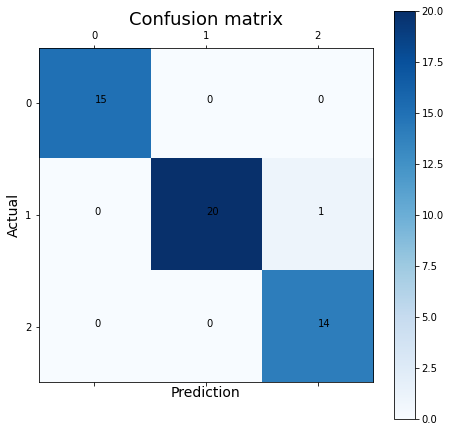

In [7]:
df_confusion = pd.crosstab(np.squeeze(test_target.to_numpy()), data_pred, rownames=['Actual'], colnames=['Prediction'])
plot_confusion_matrix(df_confusion)

In [8]:
print(classification_report(test_target, data_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Árvore de Decisão

In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_target)
data_pred = clf.predict(test_data)

In [10]:
data_pred = clf.predict(test_data)

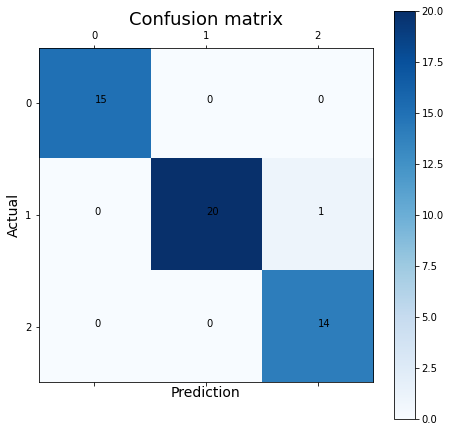

In [11]:
df_confusion = pd.crosstab(np.squeeze(test_target.to_numpy()), data_pred, rownames=['Actual'], colnames=['Prediction'])
plot_confusion_matrix(df_confusion)

In [12]:
print(classification_report(test_target, data_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# KNN (Normalizado)

K = 1
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        15
         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



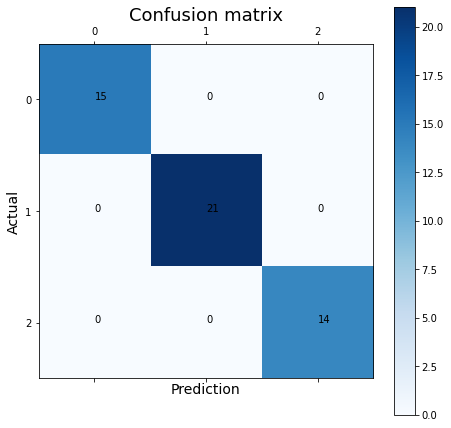

K = 3
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        15
         0.0       0.95      1.00      0.98        21
         1.0       1.00      0.93      0.96        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



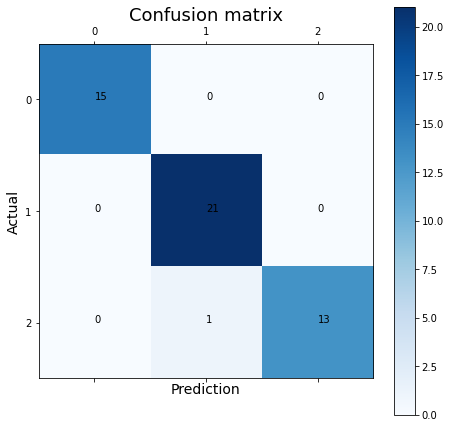

K = 5
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        15
         0.0       0.91      1.00      0.95        21
         1.0       1.00      0.86      0.92        14

    accuracy                           0.96        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.96      0.96      0.96        50



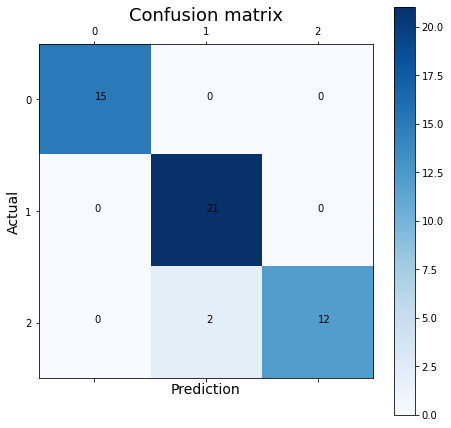

K = 7
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        15
         0.0       0.95      1.00      0.98        21
         1.0       1.00      0.93      0.96        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



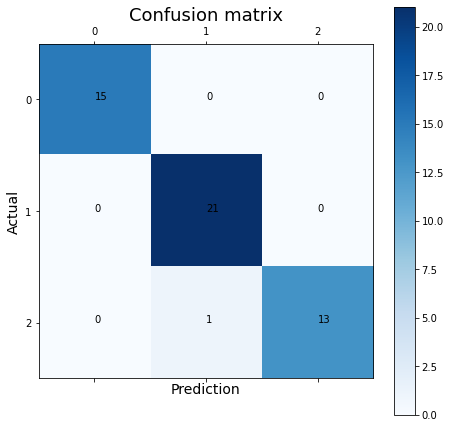

K = 9
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        15
         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



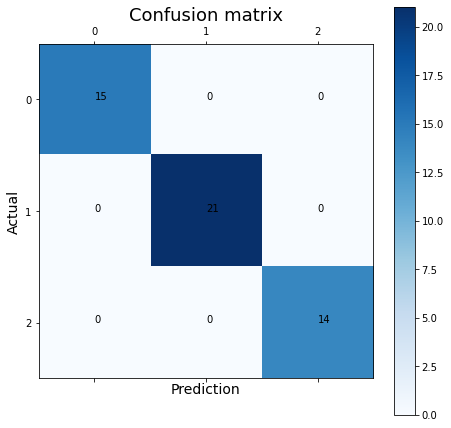

In [13]:
from sklearn.neighbors import KNeighborsClassifier
k_range = [1,3,5,7,9]
scores = {}
scores_list = []
for k in k_range:  
    print('K =', k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data_norm,train_target_norm)
    data_pred=knn.predict(test_data_norm)
    scores[k] = metrics.accuracy_score(test_target_norm,data_pred)
    scores_list.append(metrics.accuracy_score(test_target_norm,data_pred))

    print(classification_report(test_target_norm, data_pred))
    df_confusion = pd.crosstab(np.squeeze(test_target_norm.to_numpy()), data_pred, rownames=['Actual'], colnames=['Prediction'])
    plot_confusion_matrix(df_confusion)    

# MLP (Normalizado)

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import numpy as np

def hyperparameter_tune(clf, parameters, iterations, X, y):
    randomSearch = RandomizedSearchCV(clf, param_distributions=parameters, n_jobs=-1, n_iter=iterations, cv=2) 
    randomSearch.fit(X,y)
    params = randomSearch.best_params_
    score = randomSearch.best_score_
    return params, score

{},
parameters = {
    'solver': ['sgd', 'adam', 'lbfgs'],
    'activation': ['relu', 'tanh', 'logistic', 'identity'],
    'hidden_layer_sizes': [(3,), (3,3,3), (3,6,3)],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

clf = MLPClassifier(batch_size=256, verbose=True, early_stopping=True)

parameters_after_tuning, score_after_tuning = hyperparameter_tune(clf, parameters, 20, train_data_norm,train_target_norm);
print(parameters_after_tuning)
print(score_after_tuning)

{'solver': 'lbfgs', 'learning_rate': 'constant', 'hidden_layer_sizes': (3, 3, 3), 'activation': 'tanh'}
0.97


In [15]:
clf = MLPClassifier(solver=parameters_after_tuning['solver'], activation=parameters_after_tuning['activation'], hidden_layer_sizes=parameters_after_tuning['hidden_layer_sizes'])
clf.fit(train_data, train_target)
data_pred = clf.predict(test_data)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



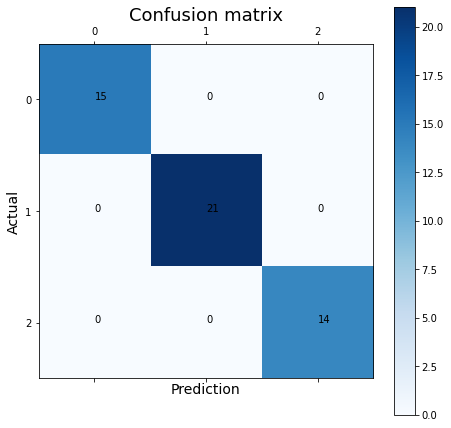

In [16]:
print(classification_report(test_target, data_pred))
df_confusion = pd.crosstab(np.squeeze(test_target.to_numpy()), data_pred, rownames=['Actual'], colnames=['Prediction'])
plot_confusion_matrix(df_confusion)

# SVM

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)  
grid.fit(train_data, train_target)

print(grid.best_params_)
print(grid.best_estimator_)
data_pred = grid.predict(test_data)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.950 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.950 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.950 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.950 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.950 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.950 total time=   0.1s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=1.000 total time=   0.1s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.950 total time=   0.1s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.950 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ..........C=1, 

[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.850 total time=   1.1s
[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=1.000 total time=   0.1s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.950 total time=   0.2s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.950 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.400 total time=   0.0s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.350 total time=   0.1s
[CV 3/5] END .....C=10, gamm

[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=1.000 total time=   0.6s
[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.950 total time=   0.9s
[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.950 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 1/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.400 total time=   0.1s
[CV 2/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 3/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 4/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.350 total time=   0.0s
[CV 5/5] END ....C=100, gamm

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.950 total time=   0.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.950 total time=   0.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.950 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.950 total time=   0.1s
[CV 1/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.400 total time=   0.2s
[CV 2/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.350 total time=   0.1s
[CV 3/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.350 total time=   0.1s
[CV 4/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.350 total time=   0.1s
[CV 5/5] END ...C=1000, gamma=1, kernel=sigmoid;, score=0.350 total time=   0.1s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.950 total time=   0.1s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.900 total time=   0.1s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=1.000 total time=   0.1s
[CV 4/5] END ..C=1000, gamma

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



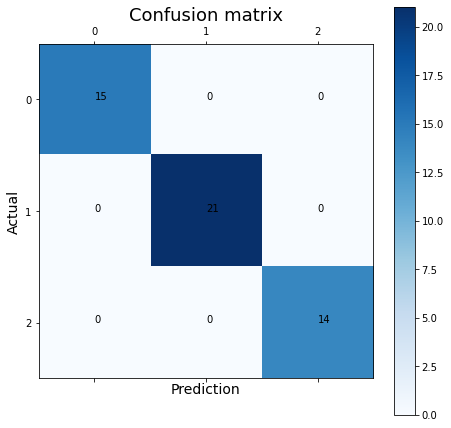

In [18]:
print(classification_report(test_target, data_pred))
df_confusion = pd.crosstab(np.squeeze(test_target.to_numpy()), data_pred, rownames=['Actual'], colnames=['Prediction'])
plot_confusion_matrix(df_confusion)